In [1]:
import pyspark

from pyspark.sql import SparkSession # importting spark context( basic builder element for Dataframe API)

spark = SparkSession.builder.appName('basics').getOrCreate() 

In [2]:
#ir(sc) ### sparkcontext is already initialized

# initialize spark conetext

# conf = SparkConf().setMaster("local").setAppName("RatingsHistogram")
# sc = SparkContext(conf = conf)


sc.__class__

Out[ 4 ]: __main__.RemoteContext

#### RDD functions

In [4]:
# ACTIONS    TRANSFORMATION

# collect     map
# count       Flatmap     
# countbyvalue filter 
# take         ditinct
# top          sample
# reduce       union/intersection/subtract/cartesian

In [5]:
####

rdd = sc.parallelize([1,2,3,4])
rdd.map(lambda x:x**2) 

rdd.collect()

Out[ 5 ]: [1, 2, 3, 4]

In [6]:
## READING FILE

df = spark.read.csv("/FileStore/tables/ginni.csv",inferSchema = True,header = True)

### SQL context

**SQLcontext vs Sparksession**

https://www.quora.com/What-is-the-difference-between-spark-context-and-spark-session


https://medium.com/@achilleus/spark-session-10d0d66d1d24 --> detailed

Prior to 2.0, SparkContext was the entry point for spark jobs. RDD was one of the main APIs then, and it was created and manipulated using Spark Context. For every other APIs, different contexts were required - For SQL, SQL Context was required; For Streaming, Streaming Context was required; For Hive, Hive Context was required.

But from 2.0, RDD along with DataSet and its subset DataFrame APIs are becoming the standard APIs and are a basic unit of data abstraction in Spark. All of the user defined code will be written and evaluated against the DataSet and DataFrame APIs as well as RDD.

Sparksession loads(in memory) both sparkcontext and sqlcontext. Also, Hivecontext and others
sparkcontext loads only sparkcontext. we have to further instantiate Sparksession to work with sql/etc objects

In [9]:
# As of Spark 2.0, this is replaced by SparkSession. However, we are keeping the class here for backward compatibility.

df1 = sqlContext.sql('select * from ginni_csv')
df1.show(2)

+----+-----+------+
Name|sales|profit|
+----+-----+------+
 A1| 6805| 49|
 A2| 6110| 28|
+----+-----+------+
only showing top 2 rows

In [10]:
# writing SQL query to obtain the result
spark.sql('select * from ginni_csv').show(2)

+----+-----+------+
Name|sales|profit|
+----+-----+------+
 A1| 6805| 49|
 A2| 6110| 28|
+----+-----+------+
only showing top 2 rows

### Excercise

#### Loading from a CSV

In [13]:
#df = spark.read.csv("/FileStore/tables/ginni.csv",inferSchema = True,header = True)

In [14]:
df.show(2)

+----+-----+------+
Name|sales|profit|
+----+-----+------+
 A1| 6805| 49|
 A2| 6110| 28|
+----+-----+------+
only showing top 2 rows

In [15]:
df.printSchema()

root
-- Name: string (nullable = true)
-- sales: integer (nullable = true)
-- profit: integer (nullable = true)

In [16]:
# using SQL
df.filter("sales > 6000").show()

+----+-----+------+
Name|sales|profit|
+----+-----+------+
 A1| 6805| 49|
 A2| 6110| 28|
 A3| 7888| 88|
 A7| 9951| 91|
 A8| 6673| 62|
 A9| 8987| 25|
 A10| 7057| 48|
 A15| 8860| 45|
 A16| 7175| 45|
+----+-----+------+

### Loading JSON

In [18]:
ds = spark.read.json('/FileStore/tables/people.json')
ds # this is a DataFrame object

Out[ 10 ]: DataFrame[age: bigint, name: string]

In [19]:
ds.show()

+----+-------+
 age| name|
+----+-------+
null|Michael|
 30| Andy|
 19| Justin|
+----+-------+

In [20]:
ds.printSchema()

root
-- age: long (nullable = true)
-- name: string (nullable = true)

In [21]:
df.describe().show() # describe returns Dataframe

+-------+----+------------------+------------------+
summary|Name| sales| profit|
+-------+----+------------------+------------------+
 count| 25| 25| 25|
 mean|null| 5368.4| 51.68|
 stddev|null|2159.6297329249137|24.489317398953094|
 min| A1| 1431| 21|
 max| A9| 9951| 100|
+-------+----+------------------+------------------+

#### Working with RDD

**Textfile**


generally, there are 2 ways to create an RDD
> textfile()

> parallelize()

In [23]:
lines = sc.textFile("/FileStore/tables/data.txt")
lines

Out[ 14 ]: /FileStore/tables/data.txt MapPartitionsRDD[28] at textFile at NativeMethodAccessorImpl.java:0

In [24]:
lines = sc.parallelize(  ['a is 2',
                          'b is 3',
                          'c is 4'
                          ,'a is 2'
                         ])

In [25]:
lines

Out[ 16 ]: ParallelCollectionRDD[29] at parallelize at PythonRDD.scala:267

In [26]:
ratings = lines.map(lambda x:x.split()[2])
ratings #ts is an RDD
result = ratings.countByValue() ## RDD action

for x, y in result.items():
  print(x,y)

3 1
4 1
2 2

#### Spark SQL(2nd video)

import collections

In [28]:
def mapper(line):
    fields = line.split(',')
    return Row(ID=int(fields[0]), name=str(fields[1].encode("utf-8")), age=int(fields[2]), numFriends=int(fields[3]))

In [29]:
lines = sc.textFile('/FileStore/tables/fakefriends.csv')
lines.collect()

Out[ 19 ]: 
['0,Will,33,385',
 '1,Jean-Luc,26,2',
 '2,Hugh,55,221',
 '3,Deanna,40,465',
 '4,Quark,68,21',
 '5,Weyoun,59,318',
 '6,Gowron,37,220',
 '7,Will,54,307',
 '8,Jadzia,38,380',
 '9,Hugh,27,181',
 '10,Odo,53,191',
 '11,Ben,57,372',
 '12,Keiko,54,253',
 '13,Jean-Luc,56,444',
 '14,Hugh,43,49',
 '15,Rom,36,49',
 '16,Weyoun,22,323',
 '17,Odo,35,13',
 '18,Jean-Luc,45,455',
 '19,Geordi,60,246',
 '20,Odo,67,220',
 '21,Miles,19,268',
 '22,Quark,30,72',
 '23,Keiko,51,271',
 '24,Julian,25,1',
 '25,Ben,21,445',
 '26,Julian,22,100',
 '27,Leeta,42,363',
 '28,Martok,49,476',
 '29,Nog,48,364',
 '30,Keiko,50,175',
 '31,Miles,39,161',
 '32,Nog,26,281',
 '33,Dukat,53,197',
 '34,Jean-Luc,43,249',
 '35,Beverly,27,305',
 '36,Kasidy,32,81',
 '37,Geordi,58,21',
 '38,Deanna,64,65',
 '39,Morn,31,192',
 '40,Odo,52,413',
 '41,Hugh,67,167',
 '42,Brunt,54,75',
 '43,Guinan,58,345',
 '44,Nerys,35,244',
 '45,Dukat,52,77',
 '46,Morn,25,96',
 '47,Brunt,24,49',
 '48,Nog,20,1',
 '49,Ezri,40,254',
 '50,Quark,51,283',
 '51,Lwaxana,36,212',
 '52,Beverly,19,269',
 '53,Geordi,62,31',
 '54,Brunt,19,5',
 '55,Keiko,41,278',
 '56,Gowron,44,194',
 '57,Odo,57,294',
 '58,Hugh,59,158',
 '59,Morn,59,284',
 '60,Geordi,20,100',
 '61,Kasidy,62,442',
 '62,Keiko,69,9',
 '63,Jean-Luc,58,54',
 '64,Elim,31,15',
 '65,Guinan,52,169',
 '66,Geordi,21,477',
 '67,Jadzia,48,135',
 '68,Guinan,33,74',
 '69,Jean-Luc,30,204',
 '70,Brunt,52,393',
 '71,Geordi,45,184',
 '72,Kasidy,22,179',
 '73,Brunt,20,384',
 '74,Leeta,65,208',
 '75,Morn,40,459',
 '76,Will,62,201',
 '77,Weyoun,40,407',
 '78,Data,61,337',
 '79,Leeta,58,348',
 '80,Dukat,67,445',
 '81,Jadzia,54,440',
 '82,Hugh,57,465',
 '83,Geordi,32,308',
 '84,Ben,28,311',
 '85,Quark,66,383',
 '86,Hugh,55,257',
 '87,Ezri,31,481',
 '88,Ben,66,188',
 '89,Worf,24,492',
 '90,Kasidy,33,471',
 '91,Rom,46,88',
 '92,Gowron,54,7',
 '93,Elim,46,63',
 '94,Morn,62,133',
 '95,Odo,29,173',
 '96,Ezri,25,233',
 '97,Nerys,69,361',
 '98,Will,44,178',
 '99,Keiko,69,491',
 '100,Jean-Luc,61,460',
 '101,Morn,67,123',
 '102,Dukat,40,18',
 '103,Ezri,61,2',
 '104,Dukat,32,142',
 '105,Morn,50,417',
 '106,Beverly,18,499',
 '107,Will,64,419',
 '108,Leeta,25,274',
 '109,Quark,53,417',
 '110,Nog,64,137',
 '111,Nerys,37,46',
 '112,Morn,25,13',
 '113,Quark,41,244',
 '114,Worf,33,275',
 '115,Dukat,18,397',
 '116,Ben,69,75',
 '117,Rom,52,487',
 '118,Ben,28,304',
 '119,Worf,29,344',
 '120,Jean-Luc,68,264',
 '121,Deanna,35,355',
 '122,Data,45,400',
 '123,Jadzia,45,439',
 '124,Data,47,429',
 '125,Rom,66,284',
 '126,Brunt,26,84',
 '127,Miles,40,284',
 '128,Julian,34,221',
 '129,Kasidy,45,252',
 '130,Gowron,67,350',
 '131,Hugh,65,309',
 '132,Odo,46,462',
 '133,Quark,19,265',
 '134,Ben,45,340',
 '135,Rom,42,427',
 '136,Will,19,335',
 '137,Martok,28,32',
 '138,Dukat,32,384',
 '139,Nog,36,193',
 '140,Elim,64,234',
 '141,Miles,36,424',
 '142,Guinan,59,335',
 '143,Data,60,124',
 '144,Miles,22,93',
 '145,Leeta,45,470',
 '146,Nerys,58,174',
 '147,Quark,61,373',
 '148,Nerys,39,248',
 '149,Beverly,49,340',
 '150,Nerys,55,313',
 '151,Keiko,54,441',
 '152,Kasidy,54,235',
 '153,Morn,63,342',
 '154,Geordi,40,389',
 '155,Beverly,50,126',
 '156,Deanna,44,360',
 '157,Dukat,34,319',
 '158,Odo,31,340',
 '159,Kasidy,67,438',
 '160,Beverly,58,112',
 '161,Odo,39,207',
 '162,Ezri,59,14',
 '163,Nerys,67,204',
 '164,Will,31,172',
 '165,Leeta,26,282',
 '166,Lwaxana,25,10',
 '167,Quark,48,57',
 '168,Martok,68,112',
 '169,Beverly,53,92',
 '170,Jean-Luc,68,490',
 '171,Weyoun,29,126',
 '172,Kasidy,55,204',
 '173,Leeta,23,129',
 '174,Deanna,47,87',
 '175,Will,38,459',
 '176,Worf,55,474',
 '177,Brunt,67,316',
 '178,Kasidy,26,381',
 '179,Elim,37,426',
 '180,Kasidy,30,108',
 '181,Rom,43,404',
 '182,Weyoun,26,145',
 '183,Ben,47,488',
 '184,Julian,44,84',
 '185,Weyoun,48,287',
 '186,Miles,31,109',
 '187,Nerys,47,225',
 '188,Keiko,54,369',
 '189,Quark,62,23',
 '190,Geordi,60,294',
 '191,Nog,40,349',
 '192,Jadzia,45,497',
 '193,Nerys,60,125',
 '194,Kasidy,38,2',
 '195,Ben,30,376',
 '196,Data,38,173',
 '197,Leeta,38,7

In [30]:
people = lines.map(mapper)

In [31]:
people

Out[ 23 ]: PythonRDD[33] at RDD at PythonRDD.scala:56

In [32]:
# Infer the schema, and register the DataFrame as a table.

# schemaPeople = spark.createDataFrame(people).cache() 

# What does cache do!
# cache()[source]
# Persists the DataFrame with the default storage level (MEMORY_AND_DISK).

# schemaPeople.createOrReplaceTempView("people")

In [33]:
## Why this error!

#lines.toDF(['_c0', '_c1', '_c2', '_c3'])

In [34]:
# rdd = sc.parallelize([(1,2,3),(4,5,6),(7,8,9)])
# rdd.collect()

# dx = rdd.toDF(["a","b","c"])
# dx.show()

In [35]:
ds = spark.read.csv('/FileStore/tables/fakefriends.csv')
ds.show(2)

+---+--------+---+---+
_c0| _c1|_c2|_c3|
+---+--------+---+---+
 0| Will| 33|385|
 1|Jean-Luc| 26| 2|
+---+--------+---+---+
only showing top 2 rows

In [36]:
ds.createOrReplaceTempView("ds")

teenagers = spark.sql("SELECT * FROM ds WHERE _c2 >= 13 AND _c2 <= 19")

In [37]:
print(teenagers.__class__)

# "BUT"

print(teenagers.collect().__class__)

<class 'pyspark.sql.dataframe.DataFrame'>
<class 'list'>

In [38]:

# The results of SQL queries are RDDs and support all the normal RDD operations.

for teen in teenagers.collect():
  print(teen)

# We can also use functions instead of SQL queries:
ds.groupBy("_c2").count().orderBy("_c2").show()

#spark.stop()

Row(_c0='21', _c1='Miles', _c2='19', _c3='268')
Row(_c0='52', _c1='Beverly', _c2='19', _c3='269')
Row(_c0='54', _c1='Brunt', _c2='19', _c3='5')
Row(_c0='106', _c1='Beverly', _c2='18', _c3='499')
Row(_c0='115', _c1='Dukat', _c2='18', _c3='397')
Row(_c0='133', _c1='Quark', _c2='19', _c3='265')
Row(_c0='136', _c1='Will', _c2='19', _c3='335')
Row(_c0='225', _c1='Elim', _c2='19', _c3='106')
Row(_c0='304', _c1='Will', _c2='19', _c3='404')
Row(_c0='341', _c1='Data', _c2='18', _c3='326')
Row(_c0='366', _c1='Keiko', _c2='19', _c3='119')
Row(_c0='373', _c1='Quark', _c2='19', _c3='272')
Row(_c0='377', _c1='Beverly', _c2='18', _c3='418')
Row(_c0='404', _c1='Kasidy', _c2='18', _c3='24')
Row(_c0='409', _c1='Nog', _c2='19', _c3='267')
Row(_c0='439', _c1='Data', _c2='18', _c3='417')
Row(_c0='444', _c1='Keiko', _c2='18', _c3='472')
Row(_c0='492', _c1='Dukat', _c2='19', _c3='36')
Row(_c0='494', _c1='Kasidy', _c2='18', _c3='194')
+---+-----+
_c2|count|
+---+-----+
 18| 8|
 19| 11|
 20| 5|
 21| 8|
 22| 7|
 23| 10|
 24| 5|
 25| 11|
 26| 17|
 27| 8|
 28| 10|
 29| 12|
 30| 11|
 31| 8|
 32| 11|
 33| 12|
 34| 6|
 35| 8|
 36| 10|
 37| 9|
+---+-----+
only showing top 20 rows

#### Dataframe API 

**JP**

In [40]:
sc # sparkcontext -  used for instantiating only RDD API(including RDD objects)

Out[ 31 ]: <SparkContext master=local[8] appName=Databricks Shell>

In [41]:
spark # Sparksession - used for instantiating all Spark API(including Dataframe,SQLcontext,Jsoncontext,RDD sparkcontext objects) 

Out[ 32 ]: <pyspark.sql.session.SparkSession at 0x7fd8bd885c50>

In [42]:
dir(sc)

Out[ 33 ]: 
['PACKAGE_EXTENSIONS',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accumulatorServer',
 '_active_spark_context',
 '_batchSize',
 '_callsite',
 '_checkpointFile',
 '_conf',
 '_dictToJavaMap',
 '_do_init',
 '_encryption_enabled',
 '_ensure_initialized',
 '_gateway',
 '_getJavaStorageLevel',
 '_initialize_context',
 '_javaAccumulator',
 '_jsc',
 '_jvm',
 '_lock',
 '_next_accum_id',
 '_pickled_broadcast_vars',
 '_python_includes',
 '_repr_html_',
 '_serialize_to_jvm',
 '_temp_dir',
 '_unbatched_serializer',
 'accumulator',
 'addClusterWideLibraryToPath',
 'addFile',
 'addIsolatedLibraryPath',
 'addPyFile',
 'appName',
 'applicationId',
 'binaryFiles',
 'binaryRecords',
 'broadcast',
 'cancelAllJobs',
 'cancelJobGroup',
 'defaultMinPartitions',
 'defaultParallelism',
 'dump_profiles',
 'emptyRDD',
 'environment',
 'getConf',
 'getLocalProperty',
 'getOrCreate',
 'hadoopFile',
 'hadoopRDD',
 'init_batched_serializer',
 'master',
 'newAPIHadoopFile',
 'newAPIHadoopRDD',
 'parallelize',
 'pickleFile',
 'profiler_collector',
 'pythonExec',
 'pythonVer',
 'range',
 'runJob',
 'sequenceFile',
 'serializer',
 'setCheckpointDir',
 'setJobDescription',
 'setJobGroup',
 'setLocalProperty',
 'setLogLevel',
 'setSystemProperty',
 'show_profiles',
 'sparkHome',
 'sparkUser',
 'startTime',
 'statusTracker',
 'stop',
 'textFile',
 'uiWebUrl',
 'union',
 'version',
 'wholeTextFiles']

In [43]:
'sparkContext' in dir(spark) # sparkcontext is a subclass within sparksession 

Out[ 35 ]: True

In [44]:
ds = spark.read.json('/FileStore/tables/people.json')
ds.show() # this is a DataFrame object

+----+-------+
 age| name|
+----+-------+
null|Michael|
 30| Andy|
 19| Justin|
+----+-------+

In [45]:
ds.describe().show()

+-------+------------------+-------+
summary| age| name|
+-------+------------------+-------+
 count| 2| 3|
 mean| 24.5| null|
 stddev|7.7781745930520225| null|
 min| 19| Andy|
 max| 30|Michael|
+-------+------------------+-------+

In [46]:
ds.printSchema()

root
-- age: long (nullable = true)
-- name: string (nullable = true)

In [47]:
ds.columns

Out[ 39 ]: ['age', 'name']

Some data types make it easier to infer schema (like tabular formats such as csv which we will show later).

However you often have to set the schema yourself if you aren't dealing with a .read method that doesn't have inferSchema() built-in.

Spark has all the tools you need for this, it just requires a very specific structure:

In [49]:
from pyspark.sql.types import  StructField,StructType,StringType,IntegerType

In [50]:
data_schema = [StructField("age", IntegerType(), True),StructField("name", StringType(), True)]

final_struc = StructType(fields=data_schema)

In [51]:
ds = spark.read.json('/FileStore/tables/people.json',schema = final_struc)

ds.printSchema()

root
-- age: integer (nullable = true)
-- name: string (nullable = true)

**df['col'] vs df.select(['col'])**

In [53]:
print(ds['age']) #this returns a column object unlike a dataframe object in python
print(ds['age'].__class__) # this is equivalent to 'age' in python

Column<b'age'>
<class 'pyspark.sql.column.Column'>

In [54]:
# basically this is "select" from SQL applied to a df object 
t = ds.select(ds['age'])
s = ds.select(ds['age']).collect()

print(t.__class__) # Dataframe
print(s.__class__) # returns list of row objects
print(s[0].__class__) # returns row objects (which are actually RDDs)

<class 'pyspark.sql.dataframe.DataFrame'>
<class 'list'>
<class 'pyspark.sql.types.Row'>

**head() vs show()**

In [56]:
print(ds.head(2))
print(type(ds.head(2)[0]))

#ds.head(2).__class__

[Row(age=None, name='Michael'), Row(age=30, name='Andy')]
<class 'pyspark.sql.types.Row'>

In [57]:
ds.select('*').show()

# df.select(['age','name']).show()

+----+-------+
 age| name|
+----+-------+
null|Michael|
 30| Andy|
 19| Justin|
+----+-------+

**Creating new columns**

In [59]:
# this is not applied on the original ds OR inplace = False
# works on column object
ds.withColumn('new_age',ds['age']+2).show()

+----+-------+-------+
 age| name|new_age|
+----+-------+-------+
null|Michael| null|
 30| Andy| 32|
 19| Justin| 21|
+----+-------+-------+

**rename column**

In [61]:
ds.withColumnRenamed('rename_age','age').show() # works on only column name & not on column object

+----+-------+
 age| name|
+----+-------+
null|Michael|
 30| Andy|
 19| Justin|
+----+-------+

**Using SQL**

To use SQL queries directly with the dataframe, you will need to register it to a temporary view:

In [63]:
# Register the DataFrame as a SQL temporary view
ds.createOrReplaceTempView("people") ## people is an RDD

In [64]:
spark.sql('select * from people').show(2)

+----+-------+
 age| name|
+----+-------+
null|Michael|
 30| Andy|
+----+-------+
only showing top 2 rows

#### BASIC OPERATIONS

**satya**

SparkSession is a mere wrapper around SparkContext to offer Spark SQL's structured/SQL features on top of Spark Core's RDDs.

In [67]:
# Let Spark know about the header and infer the Schema types!
df = spark.read.csv('/FileStore/tables/appl_stock.csv',inferSchema=True,header=True)
df.show(2)

+-------------------+----------+----------+------------------+----------+---------+------------------+
 Date| Open| High| Low| Close| Volume| Adj Close|
+-------------------+----------+----------+------------------+----------+---------+------------------+
2010-01-04 00:00:00|213.429998|214.499996|212.38000099999996|214.009998|123432400| 27.727039|
2010-01-05 00:00:00|214.599998|215.589994| 213.249994|214.379993|150476200|27.774976000000002|
+-------------------+----------+----------+------------------+----------+---------+------------------+
only showing top 2 rows

In [68]:
df.printSchema()

root
-- Date: timestamp (nullable = true)
-- Open: double (nullable = true)
-- High: double (nullable = true)
-- Low: double (nullable = true)
-- Close: double (nullable = true)
-- Volume: integer (nullable = true)
-- Adj Close: double (nullable = true)

**Filter**

In [70]:
# Using python synatx gives us a boolean
df.select(df['close'] > 200).show(2)

+-------------+
(close > 200)|
+-------------+
 true|
 true|
+-------------+
only showing top 2 rows

In [71]:
v = df['close'] > 200
v.__class__,v

Out[ 57 ]: (pyspark.sql.column.Column, Column<b'(close > 200)'>)

In [72]:
df.filter(df['close'] > 200).show(2)

+-------------------+----------+----------+------------------+----------+---------+------------------+
 Date| Open| High| Low| Close| Volume| Adj Close|
+-------------------+----------+----------+------------------+----------+---------+------------------+
2010-01-04 00:00:00|213.429998|214.499996|212.38000099999996|214.009998|123432400| 27.727039|
2010-01-05 00:00:00|214.599998|215.589994| 213.249994|214.379993|150476200|27.774976000000002|
+-------------------+----------+----------+------------------+----------+---------+------------------+
only showing top 2 rows

In [73]:
# ERROR!

# df.select('Close > 200').show(2) # returns error not bool in case of sql 

In [74]:
df.filter(df['close'] > 200).show(2)

+-------------------+----------+----------+------------------+----------+---------+------------------+
 Date| Open| High| Low| Close| Volume| Adj Close|
+-------------------+----------+----------+------------------+----------+---------+------------------+
2010-01-04 00:00:00|213.429998|214.499996|212.38000099999996|214.009998|123432400| 27.727039|
2010-01-05 00:00:00|214.599998|215.589994| 213.249994|214.379993|150476200|27.774976000000002|
+-------------------+----------+----------+------------------+----------+---------+------------------+
only showing top 2 rows

In [75]:
# ERROR! - cant write whole sql queries filter method
# df.filter('select * from df where Close < 500')

In [76]:
# Using SQL with .select()
df.filter("Close<500").select(['Open','Close']).show()

+------------------+------------------+
 Open| Close|
+------------------+------------------+
 213.429998| 214.009998|
 214.599998| 214.379993|
 214.379993| 210.969995|
 211.75| 210.58|
 210.299994|211.98000499999998|
212.79999700000002|210.11000299999998|
209.18999499999998| 207.720001|
 207.870005| 210.650002|
210.11000299999998| 209.43|
210.92999500000002| 205.93|
 208.330002| 215.039995|
 214.910006| 211.73|
 212.079994| 208.069996|
206.78000600000001| 197.75|
202.51000200000001| 203.070002|
205.95000100000001| 205.940001|
 206.849995| 207.880005|
 204.930004| 199.289995|
 201.079996| 192.060003|
192.36999699999998| 194.729998|
+------------------+------------------+
only showing top 20 rows

In [77]:
# Make sure to add in the parenthesis separating the statements!
df.filter( (df["Close"] < 200) | ~(df['Open'] > 200) ).show()

+-------------------+------------------+------------------+------------------+------------------+---------+------------------+
 Date| Open| High| Low| Close| Volume| Adj Close|
+-------------------+------------------+------------------+------------------+------------------+---------+------------------+
2010-01-22 00:00:00|206.78000600000001| 207.499996| 197.16| 197.75|220441900| 25.620401|
2010-01-28 00:00:00| 204.930004| 205.500004| 198.699995| 199.289995|293375600|25.819922000000002|
2010-01-29 00:00:00| 201.079996| 202.199995| 190.250002| 192.060003|311488100| 24.883208|
2010-02-01 00:00:00|192.36999699999998| 196.0|191.29999899999999| 194.729998|187469100| 25.229131|
2010-02-02 00:00:00| 195.909998| 196.319994|193.37999299999998| 195.859997|174585600|25.375532999999997|
2010-02-03 00:00:00| 195.169994| 200.200003| 194.420004| 199.229994|153832000|25.812148999999998|
2010-02-04 00:00:00| 196.730003| 198.370001| 191.570005| 192.050003|189413000| 24.881912|
2010-02-05 00:00:00|192.63000300000002| 196.0| 190.850002| 195.460001|212576700|25.323710000000002|
2010-02-08 00:00:00| 195.690006|197.88000300000002| 193.999994|194.11999699999998|119567700| 25.1501|
2010-02-09 00:00:00| 196.419996| 197.499994| 194.749998|196.19000400000002|158221700| 25.418289|
2010-02-10 00:00:00| 195.889997| 196.6| 194.26|195.12000700000002| 92590400| 25.27966|
2010-02-11 00:00:00| 194.880001| 199.750006|194.05999599999998| 198.669994|137586400| 25.739595|
2010-02-12 00:00:00| 198.109995| 201.639996| 195.500002|200.37999299999998|163867200|25.961142000000002|
2010-02-23 00:00:00| 199.999998| 201.330002| 195.709993| 197.059998|143773700| 25.531005|
2010-02-24 00:00:00| 198.229998|201.44000400000002| 197.840002| 200.66|115141600| 25.997419|
2010-02-25 00:00:00| 197.380005| 202.859997| 196.889994| 202.000004|166281500| 26.17103|
2014-06-09 00:00:00| 92.699997| 93.879997| 91.75| 93.699997| 75415000| 88.906324|
2014-06-10 00:00:00| 94.730003| 95.050003| 93.57| 94.25| 62777000| 89.428189|
2014-06-11 00:00:00| 94.129997| 94.760002| 93.470001| 93.860001| 45681000| 89.058142|
2014-06-12 00:00:00| 94.040001| 94.120003| 91.900002| 92.290001| 54749000| 87.568463|
+-------------------+------------------+------------------+------------------+------------------+---------+------------------+
only showing top 20 rows

In [78]:
df.filter(df["Low"] == 197.16).select('Volume').show()

# df.filter("Low = 197.16").select('Volume').show() - sql way

+---------+
 Volume|
+---------+
220441900|
+---------+

In [79]:
# Doing the same using a row object
# using asDict()

df.filter(df["Low"] == 197.16).collect()[0].asDict()

Out[ 65 ]: 
{'Low': 197.16,
 'Close': 197.75,
 'Open': 206.78000600000001,
 'Volume': 220441900,
 'Adj Close': 25.620401,
 'Date': datetime.datetime(2010, 1, 22, 0, 0),
 'High': 207.499996}

**Aggregation & Sorting**

In [81]:
df = spark.read.csv('/FileStore/tables/sales_info.csv',inferSchema=True,header=True)

In [82]:
df.printSchema()

root
-- Company: string (nullable = true)
-- Person: string (nullable = true)
-- Sales: double (nullable = true)

In [83]:
df.show(2)

+-------+-------+-----+
Company| Person|Sales|
+-------+-------+-----+
 GOOG| Sam|200.0|
 GOOG|Charlie|120.0|
+-------+-------+-----+
only showing top 2 rows

In [84]:
df.groupBy(['Company','Person'])

Out[ 69 ]: <pyspark.sql.group.GroupedData at 0x7fd8ac99cc50>

In [85]:
# predefined functions

df.groupBy('Company').mean().show()

# other predefined functions 

# min/max/sum

+-------+-----------------+
Company| avg(Sales)|
+-------+-----------------+
 APPL| 370.0|
 GOOG| 220.0|
 FB| 610.0|
 MSFT|322.3333333333333|
+-------+-----------------+

Check out this link for more info on other methods: http://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark-sql-module

Not all methods need a groupby call, instead you can just call the generalized .agg() method, that will call the aggregate across all rows in the dataframe column specified.

It can take in arguments as a single column, or create multiple aggregate calls all at once using dictionary notation.

In [87]:
# df.select('Sales')

# Gives error

In [88]:
# Max sales across everything
df.agg({'Sales':'max'}).show()

+----------+
max(Sales)|
+----------+
 870.0|
+----------+

In [89]:
# Could have done this on the group by object as well:

df.groupBy('Company').agg({"Sales":'max'}).show()

+-------+----------+
Company|max(Sales)|
+-------+----------+
 APPL| 750.0|
 GOOG| 340.0|
 FB| 870.0|
 MSFT| 600.0|
+-------+----------+

**Importing functions**

http://spark.apache.org/docs/latest/api/python/pyspark.sql.html#module-pyspark.sql.functions

In [91]:
from pyspark.sql.functions import *

df.select(countDistinct("Sales")).show()
df.select(avg('Sales')).show()
df.select(stddev("Sales")).show()

+---------------------+
count(DISTINCT Sales)|
+---------------------+
 11|
+---------------------+

+-----------------+
 avg(Sales)|
+-----------------+
360.5833333333333|
+-----------------+

+------------------+
stddev_samp(Sales)|
+------------------+
250.08742410799007|
+------------------+

**Alias**

In [93]:
df.select(countDistinct("Sales").alias("Distinct Sales")).show()

+--------------+
Distinct Sales|
+--------------+
 11|
+--------------+

**Alias and formatting**

In [95]:
from pyspark.sql.functions import format_number

In [96]:
# format_number("col_name",decimal places)
sales_std = df.select(stddev("Sales"))
sales_std.show()
sales_std.select(format_number('stddev_samp(Sales)',2).alias('std')).show()

+------------------+
stddev_samp(Sales)|
+------------------+
250.08742410799007|
+------------------+

+------+
 std|
+------+
250.09|
+------+

**Ordering**

In [98]:
# Ascending
df.orderBy("Sales").show(2)

+-------+-------+-----+
Company| Person|Sales|
+-------+-------+-----+
 GOOG|Charlie|120.0|
 MSFT| Amy|124.0|
+-------+-------+-----+
only showing top 2 rows

In [99]:
# Descending call off the column itself.
df.orderBy(df["Sales"].desc()).show(2)

+-------+------+-----+
Company|Person|Sales|
+-------+------+-----+
 FB| Carl|870.0|
 APPL| Mike|750.0|
+-------+------+-----+
only showing top 2 rows

In [100]:
df.orderBy("Sales",ascending = False).show(2)

+-------+------+-----+
Company|Person|Sales|
+-------+------+-----+
 FB| Carl|870.0|
 APPL| Mike|750.0|
+-------+------+-----+
only showing top 2 rows

#### Missing Data

In [102]:
df = spark.read.csv('/FileStore/tables/ContainsNull.csv',inferSchema = True, header = True)

df.show()

+----+-----+-----+
 Id| Name|Sales|
+----+-----+-----+
emp1| John| null|
emp2| null| null|
emp3| null|345.0|
emp4|Cindy|456.0|
+----+-----+-----+

In [103]:
# drops all rows with even 1 null values in it

df.na.drop().show() 

+----+-----+-----+
 Id| Name|Sales|
+----+-----+-----+
emp4|Cindy|456.0|
+----+-----+-----+

In [104]:
# wont drop unless there are alteast 2 null values in a row
df.na.drop(thresh = 2).show()

df.na.drop(how ='any').show() # drop row if any null exists

df.na.drop(how ='all').show() # drop row all any null exists

+----+-----+-----+
 Id| Name|Sales|
+----+-----+-----+
emp1| John| null|
emp3| null|345.0|
emp4|Cindy|456.0|
+----+-----+-----+

+----+-----+-----+
 Id| Name|Sales|
+----+-----+-----+
emp4|Cindy|456.0|
+----+-----+-----+

+----+-----+-----+
 Id| Name|Sales|
+----+-----+-----+
emp1| John| null|
emp2| null| null|
emp3| null|345.0|
emp4|Cindy|456.0|
+----+-----+-----+

In [105]:
# subsets data according to the columns selected
df.na.drop(subset = ['Sales','Name']).show()

+----+-----+-----+
 Id| Name|Sales|
+----+-----+-----+
emp4|Cindy|456.0|
+----+-----+-----+

Dropping column

In [107]:
# Drop column - can drop 1 column at a time
df.drop('name').show()

+----+-----+
 Id|Sales|
+----+-----+
emp1| null|
emp2| null|
emp3|345.0|
emp4|456.0|
+----+-----+

**Filling null data**

In [109]:
# spark auto detects the dtype of the column and the value imputed and accordingly imputes the columns

# imputing text
df.na.fill('text_only').show()

# imputing integer
df.na.fill(0).show()

# can also do on subset
df.na.fill('text', subset = ['Name']).show()

+----+---------+-----+
 Id| Name|Sales|
+----+---------+-----+
emp1| John| null|
emp2|text_only| null|
emp3|text_only|345.0|
emp4| Cindy|456.0|
+----+---------+-----+

+----+-----+-----+
 Id| Name|Sales|
+----+-----+-----+
emp1| John| 0.0|
emp2| null| 0.0|
emp3| null|345.0|
emp4|Cindy|456.0|
+----+-----+-----+

+----+-----+-----+
 Id| Name|Sales|
+----+-----+-----+
emp1| John| null|
emp2| text| null|
emp3| text|345.0|
emp4|Cindy|456.0|
+----+-----+-----+

**imputing mean**

In [111]:

from pyspark.sql.functions import mean

In [112]:
# mean vs avg??

avg_sale = df.select(mean('Sales')).collect()[0][0]

In [113]:
df.na.fill(value = avg_sale,subset = 'Sales').show()

+----+-----+-----+
 Id| Name|Sales|
+----+-----+-----+
emp1| John|400.5|
emp2| null|400.5|
emp3| null|345.0|
emp4|Cindy|456.0|
+----+-----+-----+

In [114]:
df.show()

+----+-----+-----+
 Id| Name|Sales|
+----+-----+-----+
emp1| John| null|
emp2| null| null|
emp3| null|345.0|
emp4|Cindy|456.0|
+----+-----+-----+

#### END

In [116]:
df.show()

+----+-----+-----+
 Id| Name|Sales|
+----+-----+-----+
emp1| John| null|
emp2| null| null|
emp3| null|345.0|
emp4|Cindy|456.0|
+----+-----+-----+

**np.where substitute**


**nested when**

https://stackoverflow.com/questions/42537051/pyspark-when-function-with-multiple-outputs/42537653#42537653

In [118]:
from pyspark.sql.functions import col,when

df = df.withColumn('color', when(col('Name') == 'John', 'True').otherwise('False'))
df.show()

+----+-----+-----+-----+
 Id| Name|Sales|color|
+----+-----+-----+-----+
emp1| John| null| True|
emp2| null| null|False|
emp3| null|345.0|False|
emp4|Cindy|456.0|False|
+----+-----+-----+-----+

**filtering odd/even index column ??**

In [120]:
df.show()

+----+-----+-----+-----+
 Id| Name|Sales|color|
+----+-----+-----+-----+
emp1| John| null| True|
emp2| null| null|False|
emp3| null|345.0|False|
emp4|Cindy|456.0|False|
+----+-----+-----+-----+

**Where vs Filter ??**

In [122]:
df.filter(col("Name").isin(["John", "Cindy"])).show()

df.where(col("Name").isin(["John", "Cindy"])).show()

+----+-----+-----+-----+
 Id| Name|Sales|color|
+----+-----+-----+-----+
emp1| John| null| True|
emp4|Cindy|456.0|False|
+----+-----+-----+-----+

+----+-----+-----+-----+
 Id| Name|Sales|color|
+----+-----+-----+-----+
emp1| John| null| True|
emp4|Cindy|456.0|False|
+----+-----+-----+-----+

In [123]:
# https://stackoverflow.com/questions/23279550/select-every-nth-row-from-dataframe
  
# df.new = df[seq(1, nrow(df), 5), ]

**Creating new DF**

https://github.com/rich-iannone/so-many-pyspark-examples/blob/master/spark-dataframes.ipynb

** Making a Simple DataFrame from a Tuple List **

createDataFrame(data, schema=None, samplingRatio=None, verifySchema=True)[source]¶

In [126]:
# Make a tuple list
a_list = [('a', 1), ('b', 2), ('c', 3)]

# Create a Spark DataFrame, without supplying a schema value
df_from_list_no_schema = spark.createDataFrame(a_list, ['letters', 'numbers'])

# Print the DF object
df_from_list_no_schema.show()

# Print a collected list of Row objects
df_from_list_no_schema.collect()

+-------+-------+
letters|numbers|
+-------+-------+
 a| 1|
 b| 2|
 c| 3|
+-------+-------+

 Out[ 13 ]: [Row(letters='a', numbers=1),
 Row(letters='b', numbers=2),
 Row(letters='c', numbers=3)]

#### Making a Simple DataFrame from a Dictionary

In [128]:
# Make a dictionary
a_dict = [{'letters': 'a', 'numbers': 1},
          {'letters': 'b', 'numbers': 2},
          {'letters': 'c', 'numbers': 3}]

b_dict = [{'col1':[1,2,3],'col2':[1,4,6]}]

# Create a Spark DataFrame from the dictionary
df_from_dicta = (spark.createDataFrame(a_dict)) # You will get a warning about this

df_from_dictb = (spark.createDataFrame(b_dict)) # You will get a warning about this

# Show the DataFrame
df_from_dicta.show(), df_from_dictb.show()

/databricks/spark/python/pyspark/sql/session.py:355: UserWarning: inferring schema from dict is deprecated,please use pyspark.sql.Row instead
 warnings.warn("inferring schema from dict is deprecated,"
+-------+-------+
letters|numbers|
+-------+-------+
 a| 1|
 b| 2|
 c| 3|
+-------+-------+

+---------+---------+
 col1| col2|
+---------+---------+
[1, 2, 3]|[1, 4, 6]|
+---------+---------+

 Out[ 98 ]: (None, None)

#### Making a Simple DataFrame Using a StructType Schema + RDD

In [130]:
# Define the schema
schema = StructType([
    StructField('letters', StringType(), True),
    StructField('numbers', IntegerType(), True)])

# Create an RDD from a list
rdd = sc.parallelize(a_list)

# Create the DataFrame from these raw components
nice_df = (spark.createDataFrame(rdd, schema))

# Show the DataFrame
nice_df.show()

+-------+-------+
letters|numbers|
+-------+-------+
 a| 1|
 b| 2|
 c| 3|
+-------+-------+

#### Some EDA commands**

In [132]:
nice_df.dtypes

Out[ 100 ]: [('letters', 'string'), ('numbers', 'int')]

In [133]:
nice_df.schema

Out[ 101 ]: StructType(List(StructField(letters,StringType,true),StructField(numbers,IntegerType,true)))

take vs head??

In [135]:
print(nice_df.take(2))
print(nice_df.take(2)[0].__class__)


[Row(letters='a', numbers=1), Row(letters='b', numbers=2)]
<class 'pyspark.sql.types.Row'>

In [136]:
# `count()`: returns a count of all rows in DF
print('count of rows is:',nice_df.count())

# the `explain()` function explains the under-the-hood evaluation process
nice_df.explain()

count of rows is: 3
== Physical Plan ==
*(1) Scan ExistingRDD[letters#1355,numbers#1356]

Relatively Simple DataFrame Manipulation Functions
Let's use these functions:

unionAll(): combine two DataFrames together

orderBy(): perform sorting of DataFrame columns

select(): select which DataFrame columns to retain

drop(): select a single DataFrame column to remove

filter(): retain DataFrame rows that match a condition

In [138]:
# Take the DataFrame and add it to itself
(nice_df
 .unionAll(nice_df)
 .show())

# Add it to itself twice
(nice_df
 .unionAll(nice_df)
 .unionAll(nice_df)
 .show())

# Coercion will occur if schemas don't align
(nice_df
 .select(['numbers', 'letters'])
 .unionAll(nice_df)
 .show())

(nice_df
 .select(['numbers', 'letters'])
 .unionAll(nice_df)
 .printSchema())

+-------+-------+
letters|numbers|
+-------+-------+
 a| 1|
 b| 2|
 c| 3|
 a| 1|
 b| 2|
 c| 3|
+-------+-------+

+-------+-------+
letters|numbers|
+-------+-------+
 a| 1|
 b| 2|
 c| 3|
 a| 1|
 b| 2|
 c| 3|
 a| 1|
 b| 2|
 c| 3|
+-------+-------+

+-------+-------+
numbers|letters|
+-------+-------+
 1| a|
 2| b|
 3| c|
 a| 1|
 b| 2|
 c| 3|
+-------+-------+

root
-- numbers: string (nullable = true)
-- letters: string (nullable = true)

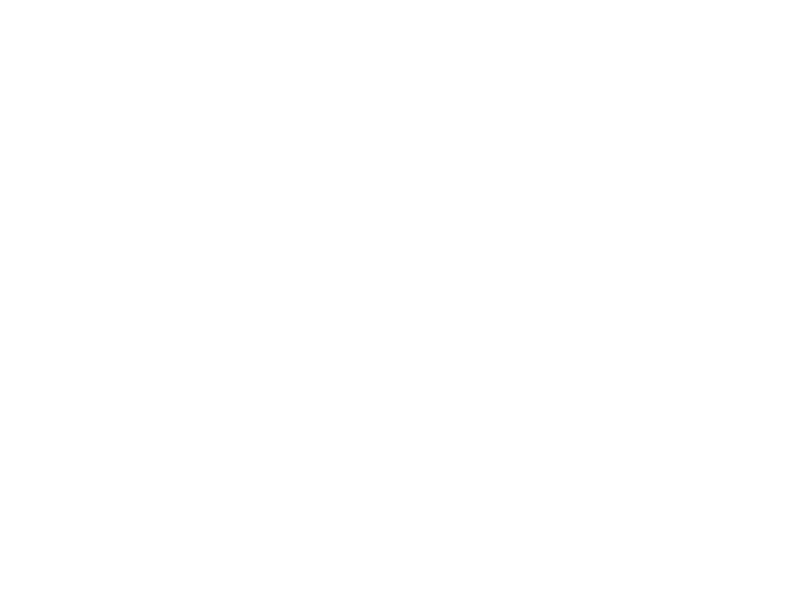

In [139]:
display(nice_df.show()) # specific to Databricks

In [140]:
flight = spark.read.csv("/FileStore/tables/nycflights13.csv",inferSchema = True,header = True)
flight.show(2)

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
2013| 1| 1| 517| 2| 830| 11| UA| N14228| 1545| EWR| IAH| 227| 1400| 5| 17|
2013| 1| 1| 533| 4| 850| 20| UA| N24211| 1714| LGA| IAH| 227| 1416| 5| 33|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
only showing top 2 rows

In [141]:
# Have a look at the `nycflights` DataFrame with the `display()` function (available for Databricks Cloud notebooks)
display(flight)

year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
2013,1,1,517,2,830,11,UA,N14228,1545,EWR,IAH,227,1400,5,17
2013,1,1,533,4,850,20,UA,N24211,1714,LGA,IAH,227,1416,5,33
2013,1,1,542,2,923,33,AA,N619AA,1141,JFK,MIA,160,1089,5,42
2013,1,1,544,-1,1004,-18,B6,N804JB,725,JFK,BQN,183,1576,5,44
2013,1,1,554,-6,812,-25,DL,N668DN,461,LGA,ATL,116,762,5,54
2013,1,1,554,-4,740,12,UA,N39463,1696,EWR,ORD,150,719,5,54
2013,1,1,555,-5,913,19,B6,N516JB,507,EWR,FLL,158,1065,5,55
2013,1,1,557,-3,709,-14,EV,N829AS,5708,LGA,IAD,53,229,5,57
2013,1,1,557,-3,838,-8,B6,N593JB,79,JFK,MCO,140,944,5,57
2013,1,1,558,-2,753,8,AA,N3ALAA,301,LGA,ORD,138,733,5,58


In [142]:
# Let's group and aggregate

# `groupBy()` will group one or more DF columns
# and prep them for aggregration functions
(flight
 .groupby('month') # creates 'GroupedData'
 .count() # creates a new column with aggregate `count` values
 .show())

# Use the `agg()` function to perform multiple
# aggregations
(flight
 .groupby('month')
 .agg({'dep_delay': 'avg', 'arr_delay': 'avg'}) # note the new column names
 .show())

# Caveat: you can't perform multiple aggregrations
# on the same column (only the last is performed)
(flight
 .groupby('month')
 .agg({'dep_delay': 'min', 'dep_delay': 'max'})
 .show())

+-----+-----+
month|count|
+-----+-----+
 1|27004|
 10|28889|
 11|16245|
+-----+-----+

+-----+--------------------+------------------+
month| avg(arr_delay)| avg(dep_delay)|
+-----+--------------------+------------------+
 1| 6.129971967573301|10.036665030396858|
 10|-0.16706268781885528| 6.243988413080655|
 11| 0.07210460772104607| 4.871981126218414|
+-----+--------------------+------------------+

+-----+--------------+
month|max(dep_delay)|
+-----+--------------+
 1| 1301|
 10| 702|
 11| 798|
+-----+--------------+

In [143]:
# Use `groupBy()` with a few columns, then aggregate

flight.groupby(['month', 'origin', 'dest']) \ # group by these unique combinations
  .count()                              # perform a 'count' aggregation on the groups
  .orderBy(['month', 'count'],
           ascending = [1, 0]) # order by `month` ascending, `count` descending

month,origin,dest,count
1,JFK,LAX,937
1,LGA,ATL,878
1,JFK,SFO,671
1,LGA,ORD,583
1,EWR,ORD,502
1,JFK,BOS,486
1,JFK,MCO,456
1,LGA,MIA,451
1,JFK,FLL,439
1,LGA,DFW,437


pivot(pivot_col, values=None)[source]
Pivots a column of the current DataFrame and perform the specified aggregation. 

There are two versions of pivot function: one that requires the caller to specify the list of distinct values to pivot on, and one that does not.

The latter is more concise but less efficient, because Spark needs to first compute the list of distinct values internally.

Parameters:	
pivot_col – Name of the column to pivot.

values – List of values that will be translated to columns in the output DataFrame.

In [145]:
# Use `groupBy()` + `pivot()` + an aggregation function to
# make a pivot table!

# Get a table of flights by month for each carrier
display(
  flight
  .groupBy(['year','month']) # group the data for aggregation by `month` number - This works like index giving unique values
  .pivot('carrier') # provide columns of data by `carrier` abbreviation
  .count()      )    # create aggregations as a count of rows

year,month,9E,AA,AS,B6,DL,EV,F9,FL,HA,MQ,OO,UA,US,VX,WN,YV
2013,10,1673,2715,62,4361,4093,4908,57,236,21,2228,null,5060,1846,472,1091,66
2013,11,959,1543,29,2451,2309,2683,36,119,15,1225,3,2922,1046,263,612,30
2013,1,1573,2794,62,4427,3690,4171,59,328,31,2271,1,4637,1602,316,996,46


In [146]:
display(
  flight
  .groupBy('month') # group the data for aggregation by `month` number
  .count() ) 

month,count
1,27004
10,28889
11,16245


In [147]:
# Another pivot table idea: get the average departure
# delay for each carrier at the different NYC airports
display(
  flight
  .groupBy('carrier')
  .pivot('origin')
  .avg('dep_delay')
)

carrier,EWR,JFK,LGA
UA,7.29702868852459,4.262845849802371,7.348459383753501
AA,7.0684563758389265,5.951749915052667,2.1251518833535843
EV,16.397844780668336,13.171717171717171,15.868944416114227
B6,7.075307748008689,4.841148886283705,9.158694001518603
DL,7.838709677419355,3.306910099376011,2.3593128011732665
OO,-0.3333333333333333,null,67.0
F9,null,null,9.397350993377483
YV,null,null,15.457364341085272
US,0.4588744588744589,4.128022759601707,-0.05963136971449223
MQ,11.06801007556675,7.306369426751592,3.200442355543268


Column Operations¶
Column instances can be created by:

(1) Selecting a column from a DataFrame

df.colName
df["colName"]
df.select(df.colName)
df.withColumn(df.colName)
(2) Creating one from an expression

df.colName + 1
1 / df.colName
Once you have a Column instance, you can apply a wide range of functions. Some of the functions covered here are:

format_number(): apply formatting to a number, rounded to d decimal places, and return the result as a string
when() & otherwise(): when() evaluates a list of conditions and returns one of multiple possible result expressions; if otherwise() is not invoked, None is returned for unmatched conditions
concat_ws(): concatenates multiple input string columns together into a single string column, using the given separator
to_utc_timestamp(): assumes the given timestamp is in given timezone and converts to UTC
year(): extracts the year of a given date as integer
month(): extracts the month of a given date as integer
dayofmonth(): extracts the day of the month of a given date as integer
hour(): extract the hour of a given date as integer
minute(): extract the minute of a given date as integer

In [149]:
# Perform 2 different aggregations, rename those new columns,
# then do some rounding of the aggregrate values
display(
  flight
  .groupby('month')
  .agg({'dep_delay': 'avg', 'arr_delay': 'avg'})
  .withColumnRenamed('avg(arr_delay)', 'mean_arr_delay')
  .withColumnRenamed('avg(dep_delay)', 'mean_dep_delay')
  .withColumn('mean_arr_delay', format_number('mean_arr_delay', 1))
  .withColumn('mean_dep_delay', format_number('mean_dep_delay', 1))
)

month,mean_arr_delay,mean_dep_delay
1,6.1,10.0
10,-0.2,6.2
11,0.1,4.9


In [150]:
# Add a new column (`far_or_near`) with a string based on a comparison
# on a numeric column; uses: `withColumn()`, `when()`, and `otherwise()`
display(
  flight
  .withColumn('far_or_near',
              when(flight.distance > 1000, 'far') # the `if-then` statement
              .otherwise('near'))                     # the `else` statement
)

year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,date,time,far_or_near
2013,1,1,517,2,830,11,UA,N14228,1545,EWR,IAH,227,1400,5,17,2013-1-1,5:17,far
2013,1,1,533,4,850,20,UA,N24211,1714,LGA,IAH,227,1416,5,33,2013-1-1,5:33,far
2013,1,1,542,2,923,33,AA,N619AA,1141,JFK,MIA,160,1089,5,42,2013-1-1,5:42,far
2013,1,1,544,-1,1004,-18,B6,N804JB,725,JFK,BQN,183,1576,5,44,2013-1-1,5:44,far
2013,1,1,554,-6,812,-25,DL,N668DN,461,LGA,ATL,116,762,5,54,2013-1-1,5:54,near
2013,1,1,554,-4,740,12,UA,N39463,1696,EWR,ORD,150,719,5,54,2013-1-1,5:54,near
2013,1,1,555,-5,913,19,B6,N516JB,507,EWR,FLL,158,1065,5,55,2013-1-1,5:55,far
2013,1,1,557,-3,709,-14,EV,N829AS,5708,LGA,IAD,53,229,5,57,2013-1-1,5:57,near
2013,1,1,557,-3,838,-8,B6,N593JB,79,JFK,MCO,140,944,5,57,2013-1-1,5:57,near
2013,1,1,558,-2,753,8,AA,N3ALAA,301,LGA,ORD,138,733,5,58,2013-1-1,5:58,near


In [151]:
# Perform a few numerical computations across columns
display(
  flight
  .withColumn('dist_per_minute',
              flight.distance / flight.air_time) # create new column with division of values
  .withColumn('dist_per_minute',
              format_number('dist_per_minute', 2)) 
   .drop('distance') 
   .drop('air_time') )    # round that new column's float value to 2 decima

year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,hour,minute,dist_per_minute
2013,1,1,517,2,830,11,UA,N14228,1545,EWR,IAH,5,17,6.17
2013,1,1,533,4,850,20,UA,N24211,1714,LGA,IAH,5,33,6.24
2013,1,1,542,2,923,33,AA,N619AA,1141,JFK,MIA,5,42,6.81
2013,1,1,544,-1,1004,-18,B6,N804JB,725,JFK,BQN,5,44,8.61
2013,1,1,554,-6,812,-25,DL,N668DN,461,LGA,ATL,5,54,6.57
2013,1,1,554,-4,740,12,UA,N39463,1696,EWR,ORD,5,54,4.79
2013,1,1,555,-5,913,19,B6,N516JB,507,EWR,FLL,5,55,6.74
2013,1,1,557,-3,709,-14,EV,N829AS,5708,LGA,IAD,5,57,4.32
2013,1,1,557,-3,838,-8,B6,N593JB,79,JFK,MCO,5,57,6.74
2013,1,1,558,-2,753,8,AA,N3ALAA,301,LGA,ORD,5,58,5.31


In [152]:
from pyspark.sql.types import *  # Necessary for creating schemas
from pyspark.sql.functions import * # Importing PySpark functions

from pyspark.sql.window import Window # for partitionby

In [153]:
# Create a proper timestamp for once in your life...
# We have all the components: `year`, `month`, `day`,
# `hour`, and `minute`

# Use `concat_ws()` (concatentate with separator) to
# combine column data into StringType columns such
# that dates (`-` separator, YYYY-MM-DD) and times
# (`:` separator, 24-hour time) are formed
flight = \
(flight
 .withColumn('date',concat_ws('-', 
                       flight.year,
                       flight.month,
                       flight.day))
 .withColumn('time',
             concat_ws(':',
                       flight.hour,
                       flight.minute)))


flight.show(2)

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+--------+----+
year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute| date|time|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+--------+----+
2013| 1| 1| 517| 2| 830| 11| UA| N14228| 1545| EWR| IAH| 227| 1400| 5| 17|2013-1-1|5:17|
2013| 1| 1| 533| 4| 850| 20| UA| N24211| 1714| LGA| IAH| 227| 1416| 5| 33|2013-1-1|5:33|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+--------+----+
only showing top 2 rows

In [154]:
# In a second step, concatenate with `concat_ws()`
# the `date` and `time` strings (separator is a space);
# then drop several columns
flight = \
(flight
 .withColumn('timestamp',
             concat_ws(' ',
                       flight.date,
                       flight.time))
 .drop('year')     # `drop()` doesn't accept
 .drop('month')    # a list of column names,
 .drop('day')      # therefore, for every column
 .drop('hour')     # we would like to remove
 .drop('minute')   # from the DataFrame, we 
 .drop('date')     # must create a new `drop()`
 .drop('time'))    # statement


# In the final step, convert the `timestamp` from
# a StringType into a TimestampType
flight = \
(flight
 .withColumn('timestamp',
             to_utc_timestamp(nycflights.timestamp, 'GMT')))

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-156526707447722> in <module> () 
 20 flight = (flight
 21 .withColumn('timestamp',
 ---> 22 to_utc_timestamp(nycflights.timestamp, 'GMT')))
 
 NameError : name 'nycflights' is not defined

In [155]:
# It probably doesn't matter in the end, but,
# I'd prefer that the `timestamp` column be
# the first column; let's make use of the
# `columns` method and get slicing!
flight = \
 (flight
  .select(flight.columns[-1:] + flight.columns[0:-1])) # recall that `columns` returns a list of column names


# If you miss the time component columns,
# you can get them back! Use the `year()`,
# `month()`, `dayofmonth()`, `hour()`, and
# `minute()` functions with `withColumn()`
display(
  flight
  .withColumn('year', year(flight.timestamp))
  .withColumn('month', month(flight.timestamp))
  .withColumn('day', dayofmonth(flight.timestamp))
  .withColumn('hour', hour(flight.timestamp))
  .withColumn('minute', minute(flight.timestamp))
)

--------------------------------------------------------------------------- 
 AttributeError Traceback (most recent call last)
 <command-156526707447723> in <module> () 
 13 display(
 14 flight 
 ---> 15 . withColumn ( 'year' , year ( flight . timestamp ) ) 
 16 . withColumn ( 'month' , month ( flight . timestamp ) ) 
 17 . withColumn ( 'day' , dayofmonth ( flight . timestamp ) ) 

 /databricks/spark/python/pyspark/sql/dataframe.py in __getattr__ (self, name) 
 1323 if name not in self . columns : 
 1324 raise AttributeError(
 -> 1325 "'%s' object has no attribute '%s'" % (self.__class__.__name__, name))
 1326 jc = self . _jdf . apply ( name ) 
 1327 return Column ( jc ) 

 AttributeError : 'DataFrame' object has no attribute 'timestamp'

**Counting the null values in a DF**

https://github.com/UrbanInstitute/pyspark-tutorials/blob/master/04_missing-data.ipynb

In [157]:
df = spark.sql('select * from ginni_csv')

df.select(df['Name'].isNull()).show(2) # column class
#.__class__

+--------------+
(Name IS NULL)|
+--------------+
 false|
 false|
+--------------+
only showing top 2 rows

In [158]:
df.filter( df['Name'].isNull() ).count()

Out[ 40 ]: 0

**dropduplicates**

https://github.com/zekelabs/pyspark/blob/master/Module%202%20-%20PySpark%20DataFrames.ipynb

Return a new DataFrame with duplicate rows removed, optionally only considering certain columns.

For a static batch DataFrame, it just drops duplicate rows.

dropDuplicates(subset=None)

In [160]:
from pyspark.sql import Row
f = sc.parallelize([ \
     Row(name='Alice', age=5, height=80), \
     Row(name='Alice', age=5, height=80), \
     Row(name='Alice', age=10, height=80)]).toDF()

In [161]:
f.show()

In [162]:
f.dropDuplicates().show()

f.dropDuplicates(['name', 'height']).show()

+---+------+-----+
age|height| name|
+---+------+-----+
 5| 80|Alice|
 10| 80|Alice|
+---+------+-----+

+---+------+-----+
age|height| name|
+---+------+-----+
 5| 80|Alice|
+---+------+-----+

#### Join & UDF apply

https://github.com/rich-iannone/so-many-pyspark-examples/blob/master/spark-dataframes.ipynb

In [164]:
df.show()